# Loading in the libraries.

In [47]:
from sklearn.cross_validation import cross_val_score, train_test_split
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import cluster, datasets
from sklearn.metrics import confusion_matrix, mean_squared_error
import matplotlib.pylab as py
from matplotlib.colors import ListedColormap
%matplotlib notebook

import numpy as np

iris = datasets.load_iris()

## Decision Trees

In [48]:
# Get some reasonable names.
X = iris['data']
y = iris['target']

In [49]:
yHat = np.zeros([len(y)])

# Exists a separator
#yHat[np.logical_or(y==1,y==2)] = 1
# No perfect separator
yHat[np.logical_or(y==1,y==0)] = 1

In [50]:
# Now we do it for the real data.
pair = [0,1]
X_train,X_test,y_train,y_test = train_test_split(X[:,pair],
                                                 yHat,
                                                 test_size=0.5)

<IPython.core.display.Javascript object>


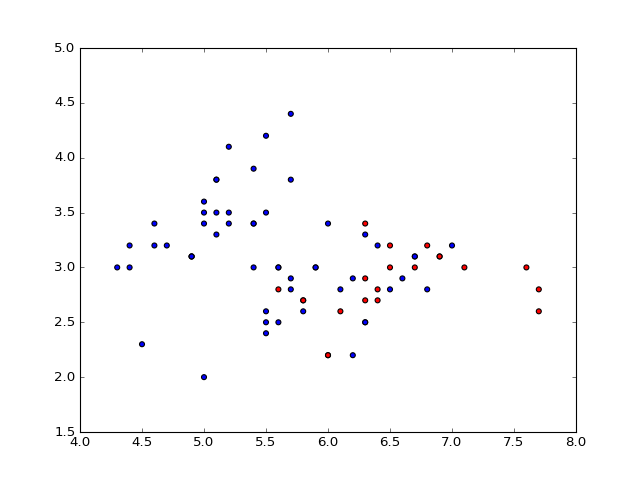

In [51]:
# Make a plot
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
py.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold,marker='o')

In [62]:
# Run the classifier
clf = DecisionTreeClassifier(max_depth=15,random_state=1234).fit(X_train, y_train)

<IPython.core.display.Javascript object>


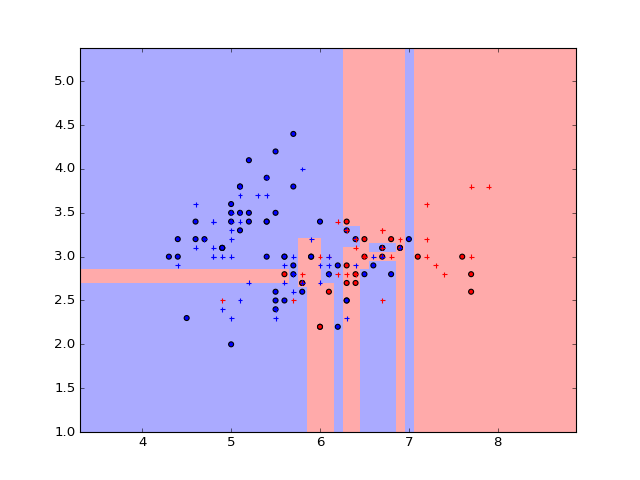

In [63]:
# Make some plots, inspired by scikit-learn tutorial

# step size in the mesh for plotting the decision boundary.
h = .02  
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1
y_min, y_max = X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
py.figure(1, figsize=(8, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
py.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
py.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold,marker='o')
py.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold,marker='+')
py.xlim(xx.min(), xx.max())
py.ylim(yy.min(), yy.max())
py.show()

In [8]:
# Print out some metrics
print("Training scores")
print(clf.score(X_train,y_train))
print("Testing scores")
print(clf.score(X_test,y_test))

Training scores
0.933333333333
Testing scores
0.826666666667


### Back to the notes.

## Regression Tree

In [70]:
# Create a random dataset.  Inspired by
# http://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

In [71]:
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size=0.5)

<IPython.core.display.Javascript object>


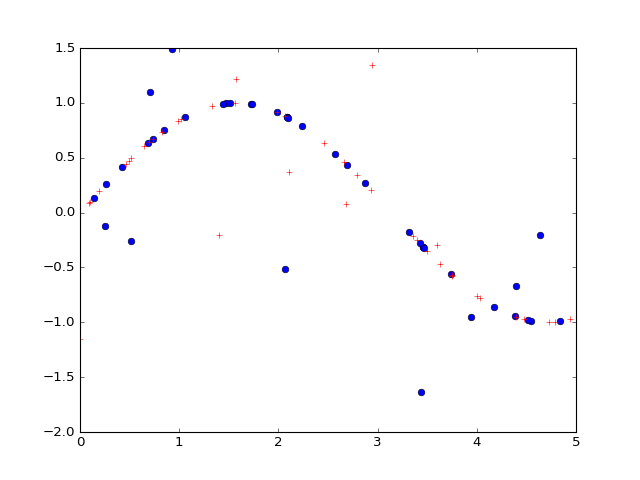

In [72]:
# Plot  the data
py.plot(X_train, y_train, 'bo')
py.plot(X_test, y_test, 'r+')

In [75]:
# Run the decision tree regression algorithm
reg = DecisionTreeRegressor(max_depth=10,random_state=1234).fit(X_train, y_train)

<IPython.core.display.Javascript object>


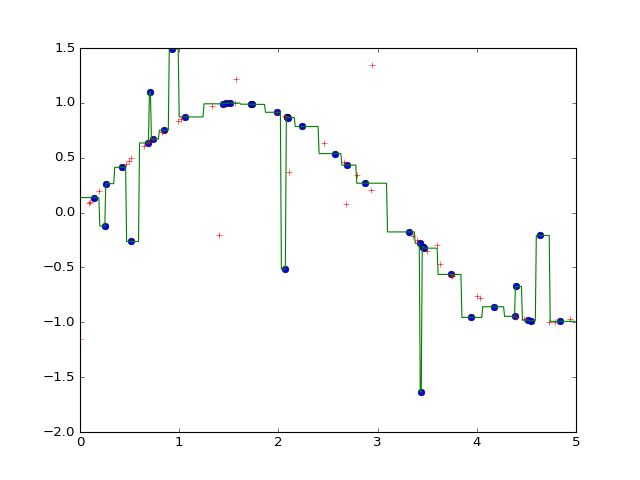

In [76]:
# Plot  the data
py.plot(X_train, y_train, 'bo')
py.plot(X_test, y_test, 'r+')
X_plot = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
py.plot(X_plot,reg.predict(np.sort(X_plot)),'g')

In [77]:
# Use the metrics package to print our errors
print('training error')
print(mean_squared_error(y_train,reg.predict(X_train)))
print('testing error')
print(mean_squared_error(y_test,reg.predict(X_test)))

training error
0.0
testing error
0.231818672276


### Back to the notes.

## Random Forest Classifier

In [78]:
# Get some reasonable names.
X = iris['data']
y = iris['target']

In [79]:
yHat = np.zeros([len(y)])

# Exists a separator
yHat[np.logical_or(y==1,y==2)] = 1
# No perfect separator
#yHat[np.logical_or(y==1,y==0)] = 1

In [80]:
# Now we do it for the real data.
pair = [0,1]
X_train,X_test,y_train,y_test = train_test_split(X[:,pair],
                                                 yHat,
                                                 test_size=0.5)

In [83]:
# Run the classifier, try 10, 20, and 100 estimators
clf = RandomForestClassifier(max_depth=2,n_estimators=10,random_state=1234).fit(X_train, y_train)

<IPython.core.display.Javascript object>


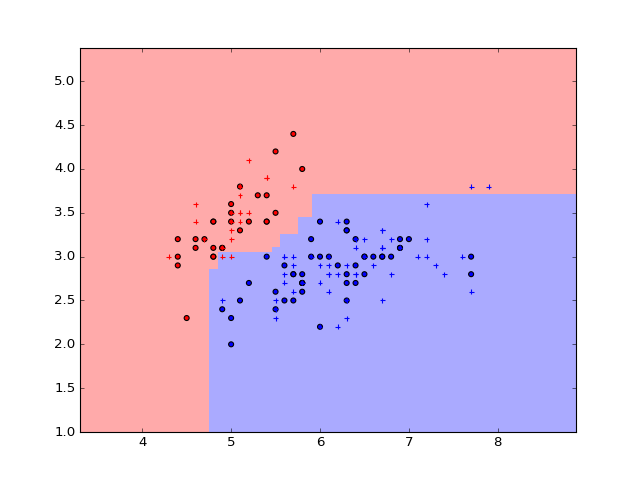

In [84]:
# Make some plots, inspired by scikit-learn tutorial

# step size in the mesh for plotting the decision boundary.
h = .02  
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1
y_min, y_max = X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
py.figure(1, figsize=(8, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
py.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
py.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold,marker='o')
py.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold,marker='+')
py.xlim(xx.min(), xx.max())
py.ylim(yy.min(), yy.max())
py.show()

In [24]:
# Print out some metrics
print("Training scores")
print(clf.score(X_train,y_train))
print("Testing scores")
print(clf.score(X_test,y_test))

Training scores
0.986666666667
Testing scores
0.906666666667


## Random Forest Regressor

In [85]:
# Create a random dataset.  Inspired by
# http://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

In [86]:
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size=0.5)

<IPython.core.display.Javascript object>


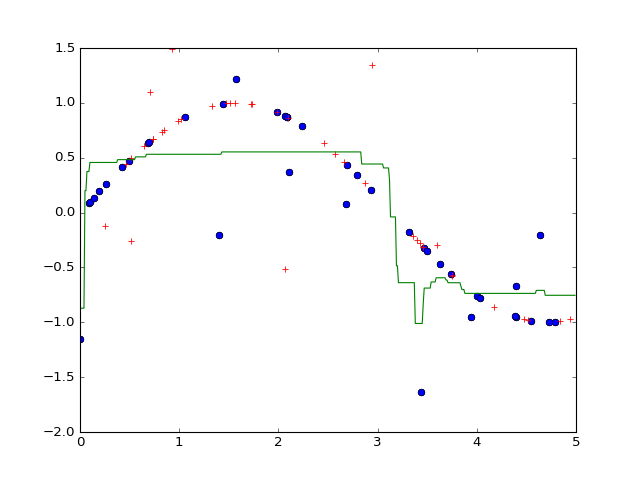

In [87]:
# Plot  the data
py.plot(X_train, y_train, 'bo')
py.plot(X_test, y_test, 'r+')

In [90]:
# Run the decision tree regression algorithm
reg = RandomForestRegressor(max_depth=2,n_estimators=20,random_state=1234).fit(X_train, y_train)

<IPython.core.display.Javascript object>


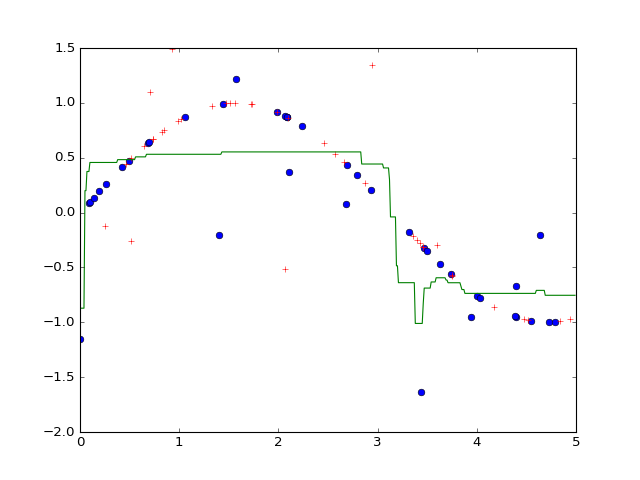

In [91]:
# Plot  the data
py.plot(X_train, y_train, 'bo')
py.plot(X_test, y_test, 'r+')
X_plot = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
py.plot(X_plot,reg.predict(np.sort(X_plot)),'g')

In [32]:
# Use the metrics package to print our errors
print('training error')
print(mean_squared_error(y_train,reg.predict(X_train)))
print('testing error')
print(mean_squared_error(y_test,reg.predict(X_test)))

training error
0.132874060217
testing error
0.206642071946


### Back to the notes.

## K-means

In [92]:
# Load in the data.
iris = datasets.load_iris()

In [93]:
# Get some reasonable names.
X = iris['data']
y = iris['target']

In [94]:
# Note, there is no test set here.   Why!?
# Bad projection
pair = [0,1]
# Good projection
#pair = [1,2]

Xtrain = X[:,pair]

In [95]:
# We make a K-means classifier
k_means = cluster.KMeans(n_clusters=3)
# and run it.  Note, "y" does not appear!  That is what makes it unsupervised.
k_means.fit(Xtrain)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

<IPython.core.display.Javascript object>


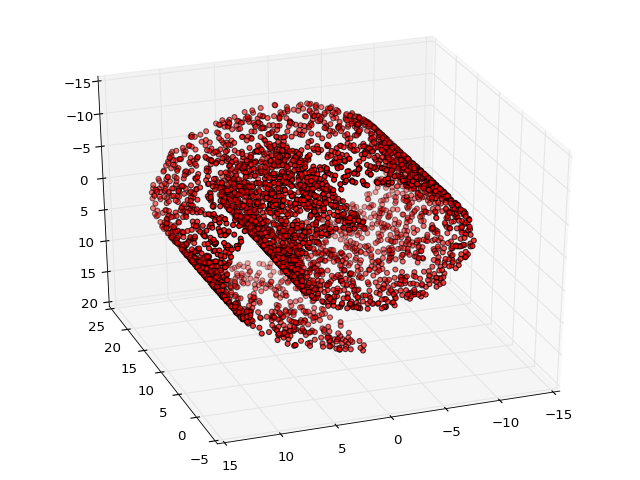

In [96]:
# Make some plots, inspired by scikit-learn tutorial

# step size in the mesh for plotting the decision boundary.
h = .02  
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = Xtrain[:, 0].min() - 1, Xtrain[:, 0].max() + 1
y_min, y_max = Xtrain[:, 1].min() - 1, Xtrain[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = k_means.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
py.figure(1, figsize=(8, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
py.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
py.scatter(Xtrain[:, 0], Xtrain[:, 1], c=y, cmap=cmap_bold,marker='o')
py.xlim(xx.min(), xx.max())
py.ylim(yy.min(), yy.max())
py.show()

In [97]:
# print out some scores
print(confusion_matrix(y,k_means.predict(Xtrain)))

[[ 0 50  0]
 [12  0 38]
 [35  0 15]]


In [98]:
# The true y
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [99]:
# Of course, the labels here need to be considered carefully!
k_means.predict(Xtrain)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0,
       2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

<b>Back to the notes.</b>

## Manifold learning

In [103]:
import matplotlib.pylab as py
from mpl_toolkits.mplot3d import Axes3D

In [104]:
# Load in the data
from sklearn import manifold, datasets
X, color = datasets.samples_generator.make_swiss_roll(n_samples=4000)

<IPython.core.display.Javascript object>


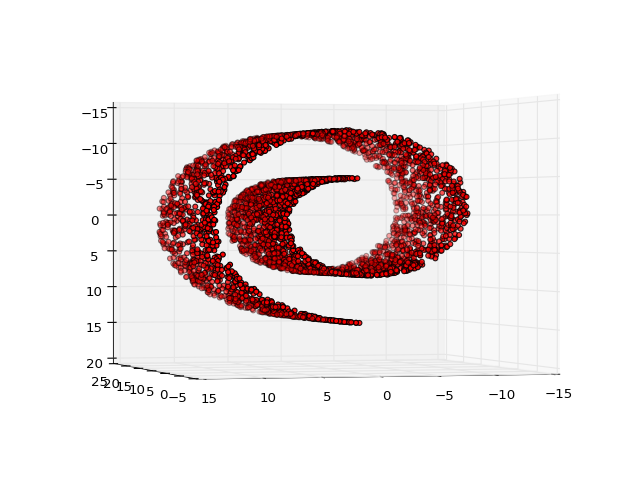

In [105]:
# Take a look at it
fig = py.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X[:,0], 
           X[:,1], 
           X[:,2],
           c='r')
py.show()

In [106]:
# Compute LLE
X_r, err = manifold.locally_linear_embedding(X, n_neighbors=10,
                                             n_components=2,method='ltsa')

In [107]:
# Look at the embedding
X_r[1:10,:]

array([[ 0.00229857, -0.01105814],
       [-0.00990819, -0.00694612],
       [ 0.0215554 , -0.02439402],
       [ 0.00670854,  0.00854761],
       [ 0.00387909,  0.01925587],
       [ 0.01550832,  0.00693512],
       [-0.00598949, -0.00709269],
       [-0.03042375, -0.02341919],
       [-0.02927526, -0.02254017]])

<IPython.core.display.Javascript object>


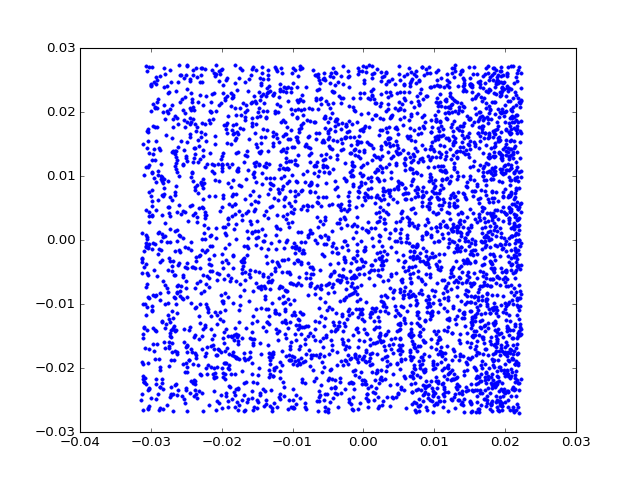

In [108]:
# The embedding
py.plot(X_r[:,0],X_r[:,1],'b.')